In [1]:
import matplotlib.pyplot as plt 
import numpy as np 


In [2]:
def univariate_normal(x, mu, sigma) : 
    return (1/(np.sqrt(2*np.pi)*sigma))* np.exp(-0.5/(sigma**2)*((x-mu)**2))

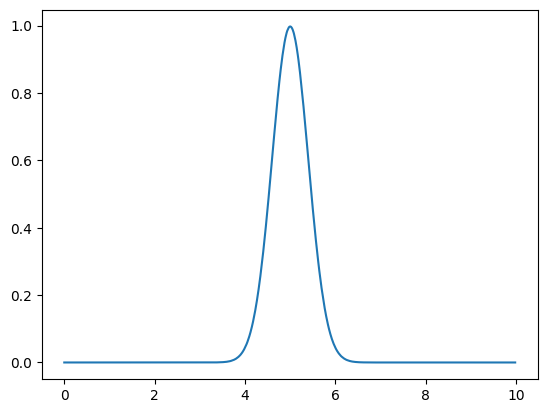

In [3]:
x = np.random.uniform(size=1000, low=0, high=10)
x = np.sort(x)
mu = 5
sigma = .4
f_x = univariate_normal(x, mu, sigma)
plt.plot(x, f_x)

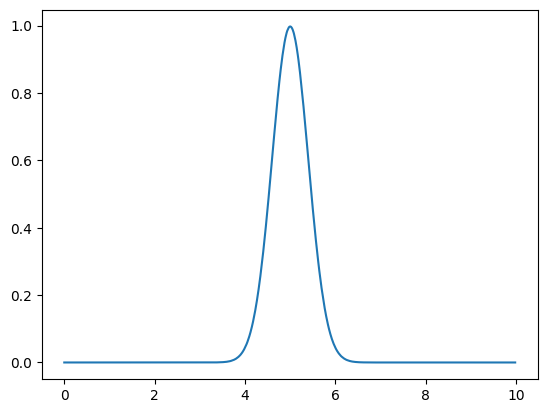

In [5]:
from scipy.stats import norm

y = norm.pdf(x,5,.4)
plt.plot(x, y)

In [6]:
def multivariate_normal(x, M, sigma) : 
    
    return (1/np.sqrt(2*np.pi))*sigma* np.exp(-0.5*(sigma**2)*((x-mu)**2))
    

In [7]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D 

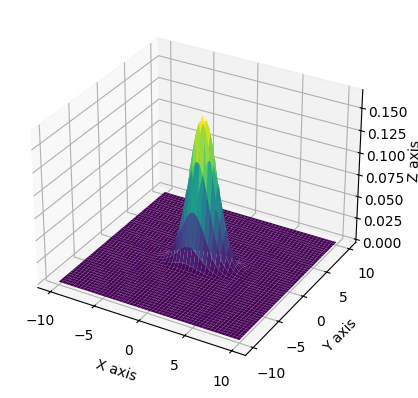

In [9]:

rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
x_1 = np.linspace(-10, 10, 1000)
x_2 = np.linspace(-10,10,1000)

X, Y = np.meshgrid(x_1, x_2)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
Z = rv.pdf(pos)

#Make a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X, Y, Z,cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()
plt.show()


In [10]:
Z.shape

(1000, 1000)

<function seaborn.axisgrid.jointplot(data=None, *, x=None, y=None, hue=None, kind='scatter', height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, color=None, palette=None, hue_order=None, hue_norm=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, **kwargs)>

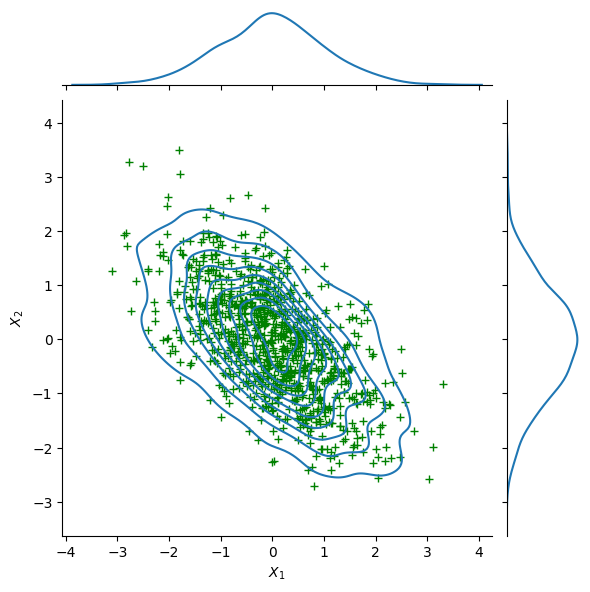

In [14]:
import pandas as pd
import seaborn as sns

mean, cov = [0., 0.], [(1., -0.6), (-0.6, 1.)]
data = np.random.multivariate_normal(mean, cov, 1000)
df = pd.DataFrame(data, columns=["x1", "x2"])
g = sns.jointplot(data=df, kind="kde", x='x1', y='x2')

g.plot_joint(plt.scatter, c="g", s=30, linewidth=1, marker="+")

g.set_axis_labels(r"$X_1$", "$X_2$");

#g.ax_joint.legend_.remove()
plt.show()

In [15]:
Z.shape

(1000, 1000)

In [16]:
Z[0].shape

(1000,)

In [17]:
X = np.random.normal(size=(2, 10))

In [18]:
X

array([[ 0.08956687, -0.52258141,  0.61791757, -0.34679028,  0.02366158,
        -0.24797636, -0.6602865 ,  1.17013795, -0.94511321, -0.02832108],
       [ 0.97814621,  0.20276151,  0.50207686,  0.14880343,  0.64851937,
         0.27810857, -0.56609157,  0.40008177, -0.25435707, -0.62473129]])

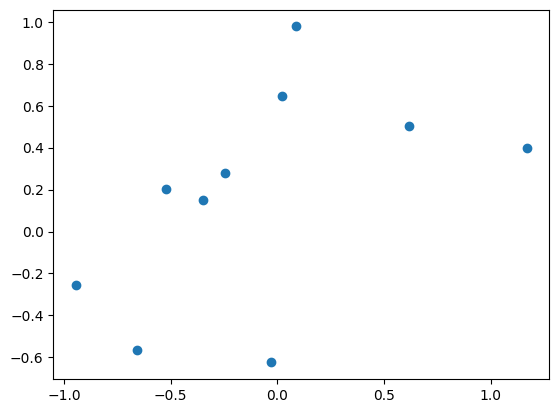

In [19]:
plt.scatter(X[0, :], X[1, :])

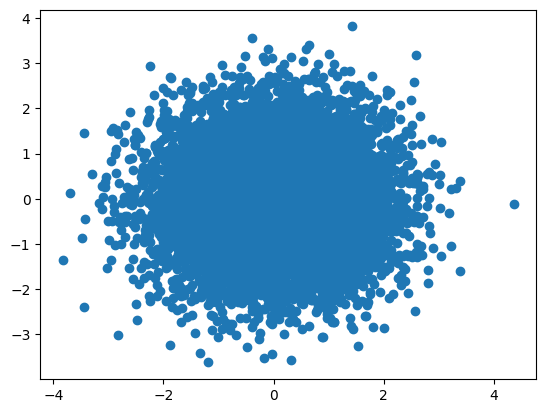

In [20]:
X = np.random.normal(size=(2, 10000))
plt.scatter(X[0, :], X[1,:])

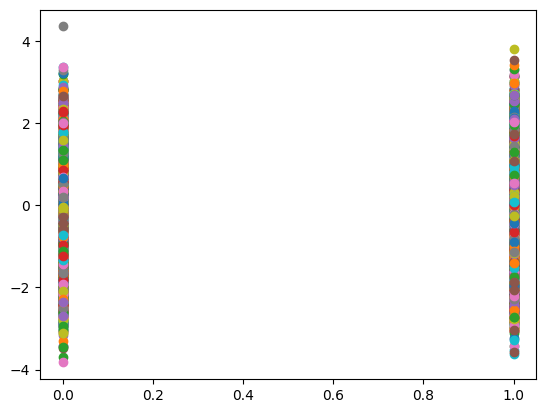

In [21]:
plt.plot(np.linspace(0,1,2), X, 'o')
plt.show()

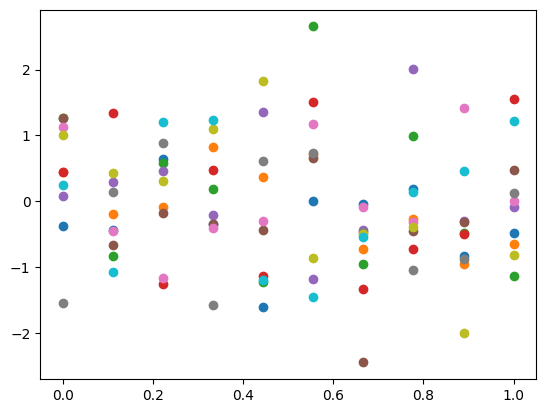

In [22]:
X = np.random.normal(size=(10, 10))
plt.plot(np.linspace(0,1,10), X, 'o')
plt.show()

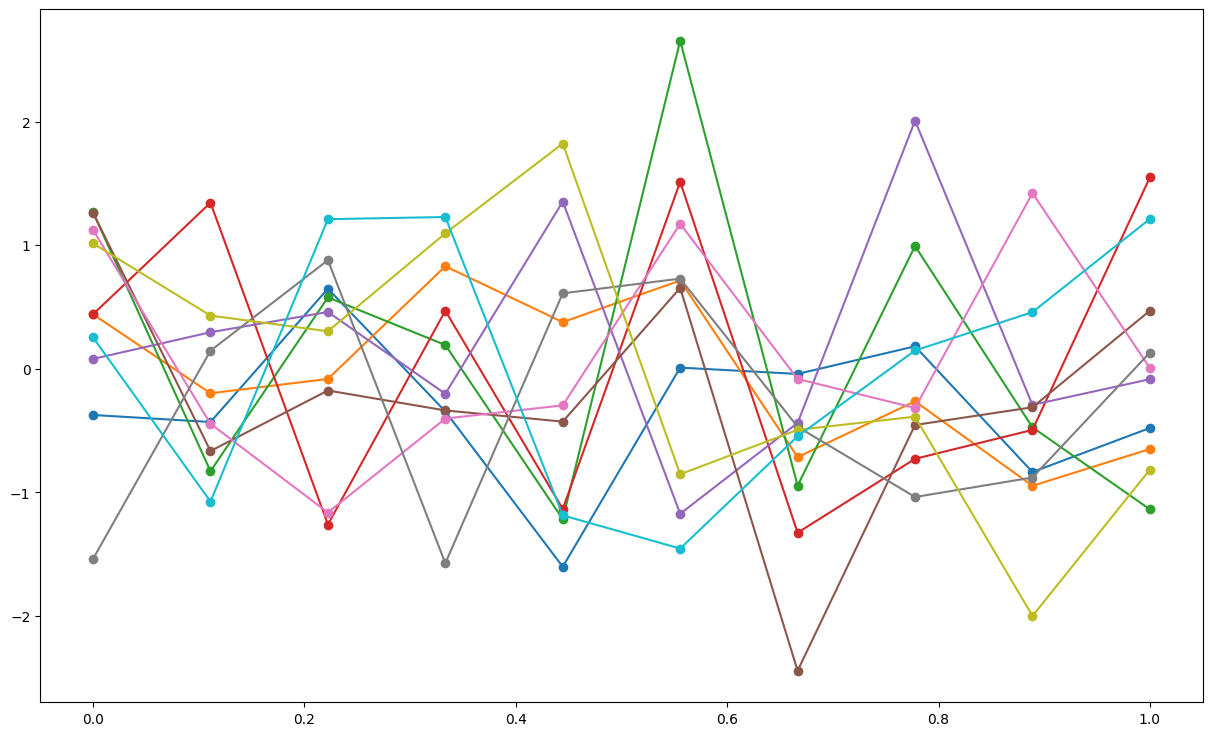

In [23]:
plt.figure(figsize=(15,9))
for i in range(10): 
    plt.plot(np.linspace(0,1,10), X[:, i], 'o-')
plt.show()

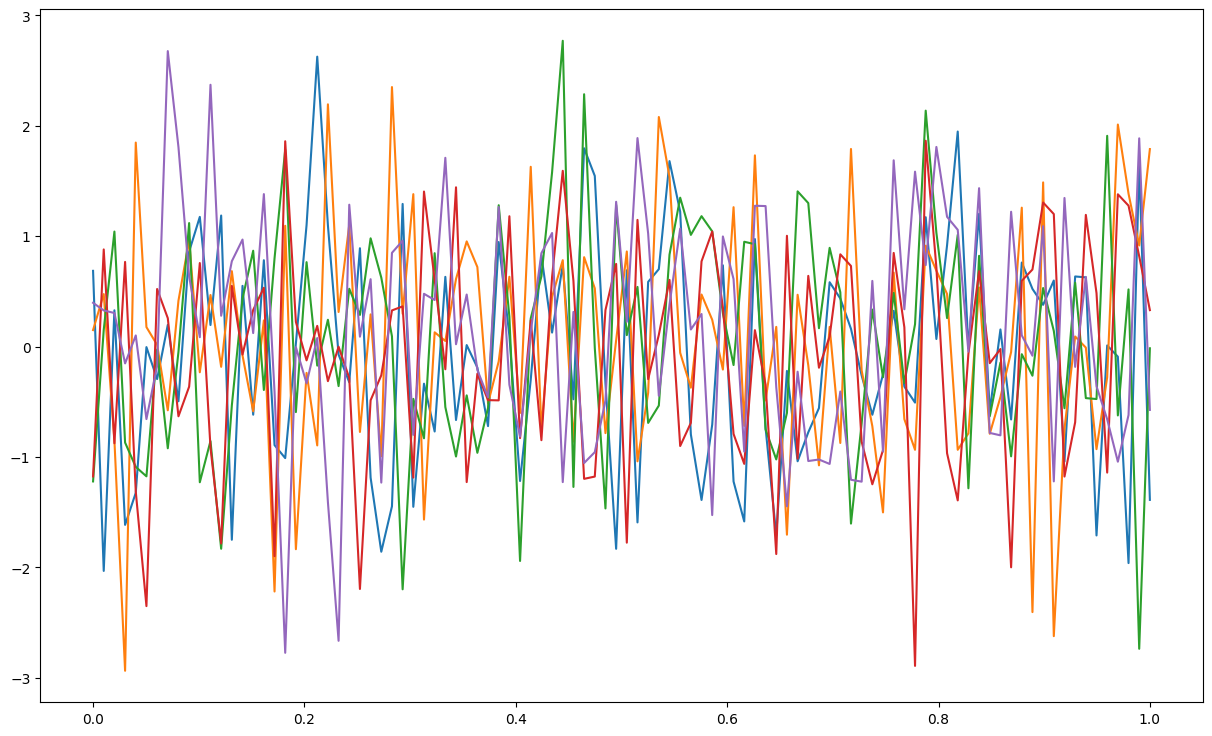

In [24]:
X = np.random.normal(size=(100, 5))
y = np.linspace(0,1,100)
plt.figure(figsize=(15,9))
for i in range(5): 
    plt.plot(y, X[:, i], '-')
plt.show()

In [25]:
# Define the kernel
def kernel(a, b):
    sqdist = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    # np.sum( ,axis=1) means adding all elements columnly; .reshap(-1, 1) add one dimension to make (n,) become (n,1)
    return np.exp(-.5 * sqdist)

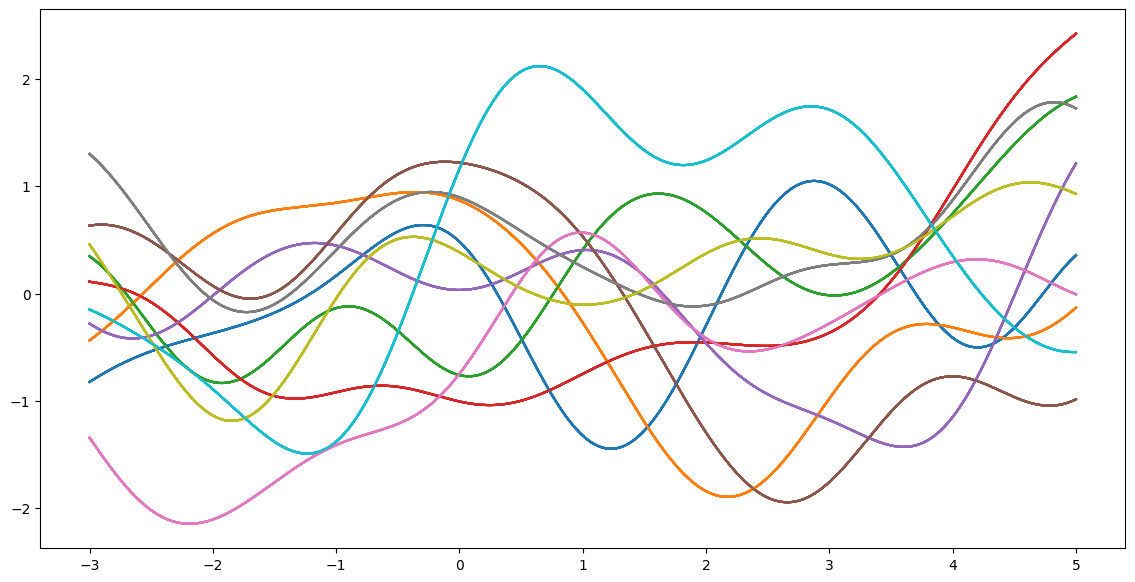

In [26]:
N = 1000
m = 10
X = np.linspace(-3, 5, N)

X = X.reshape(-1,1)  

K_ = kernel(X, X)                  # k(x_star, x_star)        

mean = np.zeros(N)
f_prior = np.random.multivariate_normal(mean, K_, m).T

plt.figure(figsize=(14,7))
plt.clf()

for i in range(m):
    plt.plot(X, f_prior, '-')

plt.show()

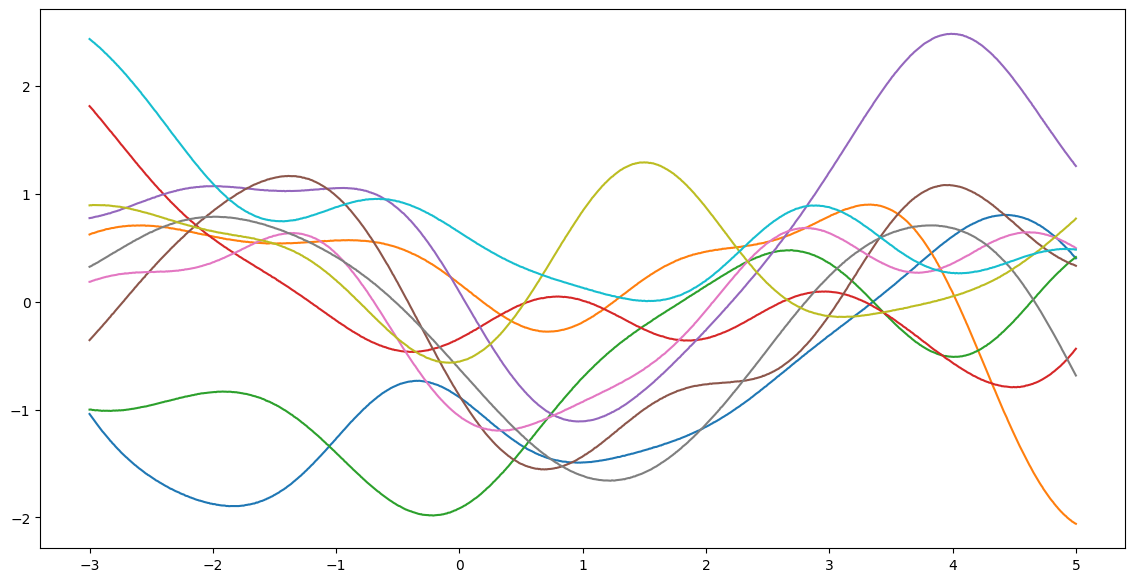

In [27]:

N = 1000
m = 10
X = np.linspace(-3, 5, N)

X = X.reshape(-1,1)  

K_ = kernel(X, X)                  # k(x_star, x_star)        

mean = np.zeros(N)
L = np.linalg.cholesky(K_ + 1e-6*np.eye(N))
f_prior = np.dot(L, np.random.normal(size=(N,m)))

plt.figure(figsize=(14,7))
plt.clf()

for i in range(m):
    plt.plot(X, f_prior[:, i], '-')

plt.show()

## Dataset generation
We will start by generating a synthetic dataset. The true generative process is defined as $f(x) = x \sin(x)$.

In [28]:
f = lambda x: x * np.sin(x)
#f = lambda x: np.sin(0.9*x)
a,b = -5,5
N = 200

X = np.linspace(start=a, stop=b, num=N).reshape(-1, 1)
y = np.squeeze(f(X))

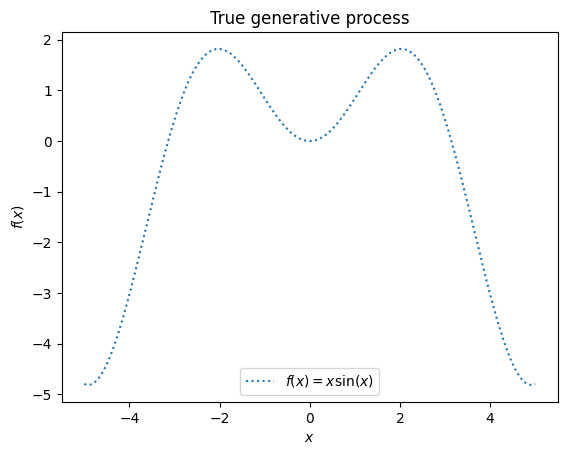

In [29]:
import matplotlib.pyplot as plt

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

We will use this dataset in the next experiment to illustrate how Gaussian Process regression is working.

## Example with noise-free target

In this first example, we will use the true generative process without adding any noise. For training the Gaussian Process regression, we will only select a few samples.

In [30]:

def split_data(X, y, ts) : 
    N = X.shape[0]
    rng = np.random.RandomState(1)
    N_test = N - ts
    training_indices = rng.choice(np.arange(N), size=ts, replace=False)
    test_indices = np.array(list(set(np.arange(N)) - set(training_indices)))
    X_train, y_train = X[training_indices], y[training_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    return X_train, y_train, X_test, y_test

## test 
X_train, y_train, X_test, y_test = split_data(X, y, ts=10)

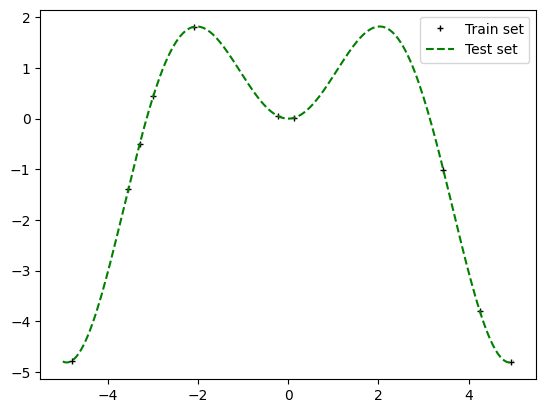

In [31]:
plt.plot(X_train, y_train,'k+', ms=5, label="Train set")
plt.plot(X_test, y_test, "g--", label="Test set")
plt.legend()
plt.show()

## Implementing our kernel
We use a general Squared Exponential Kernel, also called Radial Basis Function Kernel or Gaussian Kernel:

$$
\kappa(\mathbf{x}_i,\mathbf{x}_j) = \sigma_f^2 \exp(-\frac{1}{2l^2}
  (\mathbf{x}_i - \mathbf{x}_j)^T
  (\mathbf{x}_i - \mathbf{x}_j))
$$

where $\sigma_f$ and $l$ are hyperparameters. More information about the hyperparameters can be found after the codes. 

In [33]:
from sklearn.gaussian_process.kernels import RBF 

In [34]:
# Define the kernel
def my_SEK(x, x_start, l=1, sigma=1):
    sqdist = np.sum(x**2,axis=1).reshape(-1,1) + np.sum(x_start**2,1) - 2*np.dot(x, x_start.T)
    # np.sum( ,axis=1) means adding all elements columnly; .reshap(-1, 1) add one dimension to make (n,) become (n,1)
    return np.square(sigma)*np.exp(-.5 * (1/np.square(l)) * sqdist)

In [35]:
## Test our SEK 
l = 1
sigma = 1.0
x = np.random.normal(size=(2, 1))
x_start = np.random.normal(size=(2, 1))
k = my_SEK(x, x_start, l, sigma)
print("Our SEK is equal to: ", k)

Our SEK is equal to:  [[0.90998693 0.38429841]
 [0.62627606 0.15950209]]


In [36]:
kernel = (sigma**2)*RBF(l)

In [37]:
k_sklearn = kernel(x, x_start)
k == k_sklearn

array([[ True,  True],
       [ True, False]])

In [38]:
k_sklearn

array([[0.90998693, 0.38429841],
       [0.62627606, 0.15950209]])

In [39]:
k 

array([[0.90998693, 0.38429841],
       [0.62627606, 0.15950209]])

In [40]:
## Our simple GPR like a hispter 
def my_gpr(X_train, Y_train, X_test, kernel, sigma_y, l=1, sigma_f=1): 
    N = X_train.shape[0]
    K = kernel(X_train, X_train, l, sigma_f) # line 1
    
    v = np.linalg.solve(K + sigma_y*np.eye(N), Y_train) # line 2 compute (K+ sigma_n^2I)^-1 Y
    
    K_start = kernel(X_train, X_test, l, sigma_f) # line 3 k_star = \kappa(X, X_start)
       
    f_start = np.dot(K_start.T, v)    # line 4 f_* =  K_start (K+ sigma_n^2I)^-1 Y
    
    K_start_start = kernel(X_test, X_test, l, sigma_f)  # line 5 K** = \kapa(x_star, x_star)  
    v_start = np.linalg.solve(K + sigma_y*np.eye(N), K_start) # line 6 \mathbf{v}_* := (\mathbf{K} + \sigma^2_n \mathbf{I})^{-1} \mathbf{K}_*
    cov_f = K_start_start - np.dot(K_start.T, v_start) # line 7 \cov[\bar{\mathbf{f}}_*] = K_{**} - \mathbf{K}^T v*  
    var_f = np.sqrt(np.diag(cov_f)) # line 8
    return f_start, var_f

In [41]:
s = 0.0005    # noise variance.
ts = 8
X_train, y_train, X_test, y_test = split_data(X, y, ts)
y_train = y_train + s*np.random.randn(ts)
mu_predicted, s_p = my_gpr(X_train, y_train, X_test, my_SEK, s)

print(s_p.shape)
print(s_p>0)

(192,)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  

In [43]:
s_p.shape

(192,)

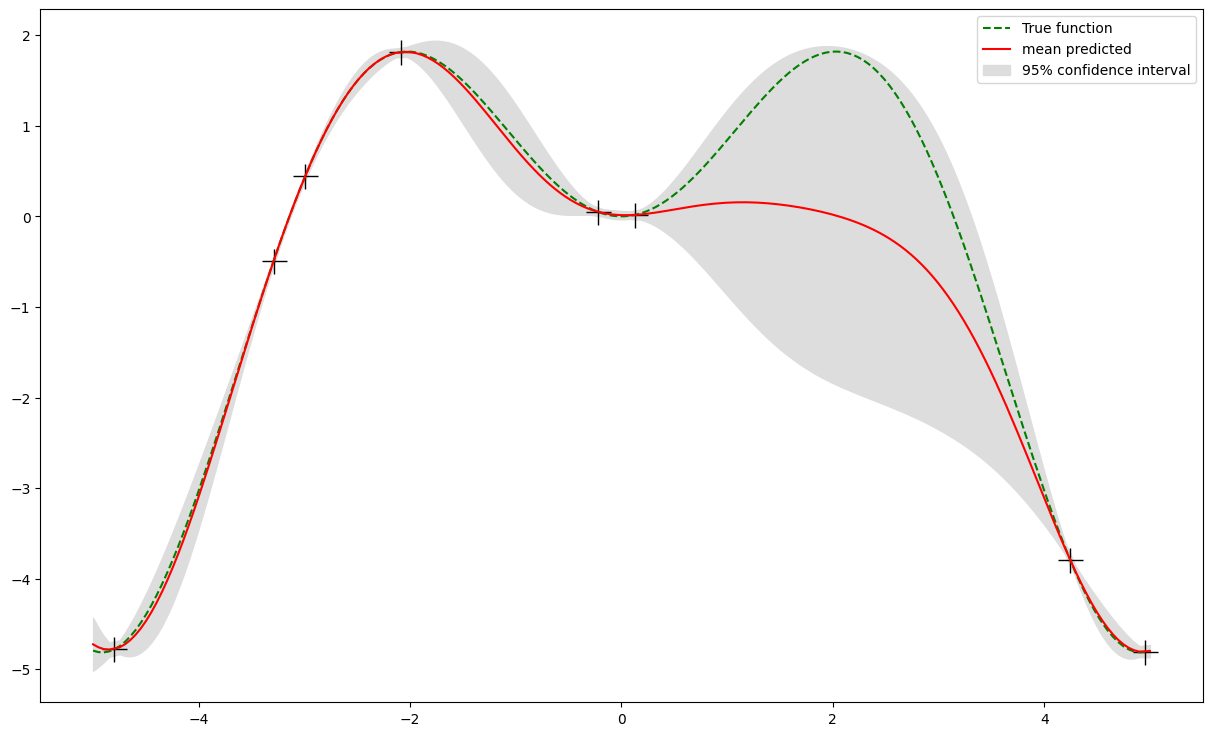

In [44]:
plt.figure(figsize=(15,9))
plt.plot(X_train, y_train,'k+', ms=18)
plt.plot(X, y, "g--", label="True function")
plt.plot(X_test, mu_predicted, 'r-', label="mean predicted")
plt.gca().fill_between(X_test.flat, mu_predicted-1.96*s_p, mu_predicted+1.96*s_p, color="#dddddd", label="95% confidence interval")
plt.legend()

In [45]:
## Our better GPR version. 
def my_gpr_better(X_train, Y_train, X_test, kernel, sigma_y, l=1, sigma_f=1): 
    N = X_train.shape[0]
    K = kernel(X_train, X_train, l, sigma_f) # line 1
    L = np.linalg.cholesky(K + sigma_y*np.eye(N))     # line 2

    m = np.linalg.solve(L, Y_train) # line 3
    
    K_start = kernel(X_train, X_test, l, sigma_f) # k_star = kernel(X, Xtest)
    Lk = np.linalg.solve(L, K_start)   # calculating v := l\k_star
        
    mu = np.dot(Lk.T, m)    # line 6 
    
    K_start_start = kernel(X_test, X_test, l, sigma_f)  # line 5 K** = \kapa(x_star, x_star)         
    s2 = np.diag(K_start_start) - np.sum(Lk**2, axis=0)   
    s = np.sqrt(s2)
    return mu, s, Lk

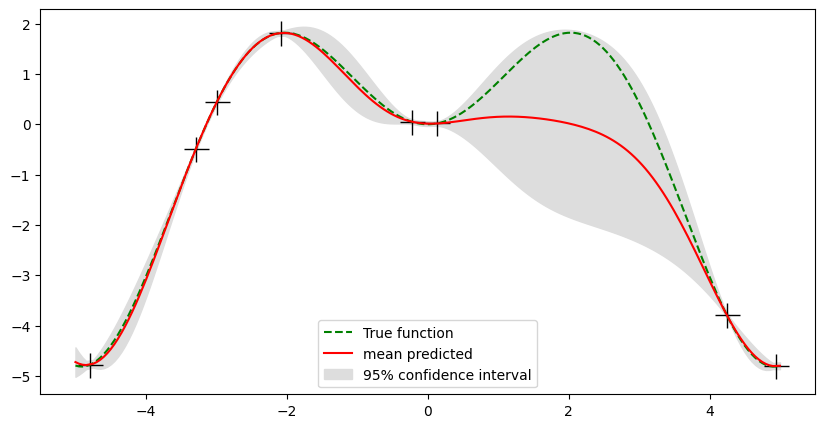

In [49]:
s = 0.0005    # noise variance.
ts = 8
X_train, y_train, X_test, y_test = split_data(X, y, ts)
y_train = y_train + s*np.random.randn(ts)
mu_predicted, s_better, Lk = my_gpr_better(X_train, y_train, X_test, my_SEK, s)

plt.figure(figsize=(10,5))
plt.plot(X_train, y_train,'k+', ms=18)
plt.plot(X, y, "g--", label="True function")
plt.plot(X_test, mu_predicted, 'r-', label="mean predicted")
plt.gca().fill_between(X_test.flat, mu_predicted-1.96*s_better, mu_predicted+1.96*s_better, color="#dddddd", label="95% confidence interval")
plt.legend()


<Figure size 640x480 with 0 Axes>

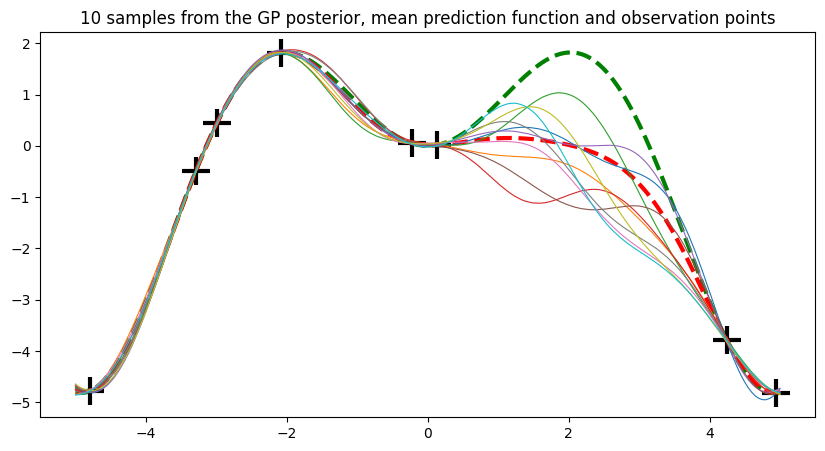

In [48]:
K_ = kernel(X_test, X_test)  
L = np.linalg.cholesky(K_ + 1e-6*np.eye(N-ts) - np.dot(Lk.T, Lk))
n_samples = 10 
f_post = mu_predicted.reshape(-1,1) + np.dot(L, np.random.normal(size=(N-ts,n_samples)))  # size=(N-ts, m), m shown how many posterior  
plt.figure(3)
plt.clf()
plt.figure(figsize=(10,5))
plt.plot(X, y, 'g--', markersize=20, linewidth=3)
plt.plot(X_train, y_train, 'k+', markersize=20, markeredgewidth=3)
plt.plot(X_test, mu_predicted, 'r--', linewidth=3)
plt.plot(X_test, f_post, linewidth=0.8)
plt.title(str(n_samples)+' samples from the GP posterior, mean prediction function and observation points')
plt.show()

In [50]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

3.3**2 * RBF(length_scale=1.84)

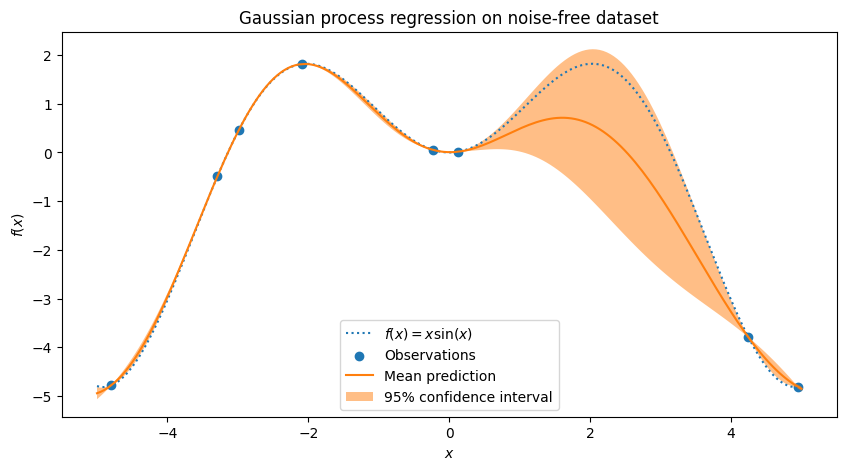

In [52]:
mean_prediction, std_prediction = gaussian_process.predict(X_test, return_std=True)
plt.figure(figsize=(10,5))
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X_test, mean_prediction, label="Mean prediction")
plt.fill_between(
    X_test.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

## Hyperparameters tuning 

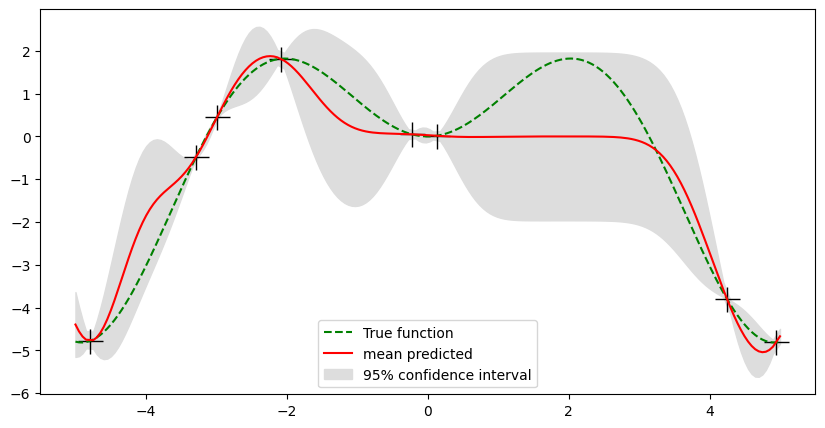

In [55]:
l = .5
mu_predicted, s_p, Lk = my_gpr_better(X_train, y_train, X_test, my_SEK, s, l=l)

plt.figure(figsize=(10,5))
plt.plot(X_train, y_train,'k+', ms=18)
plt.plot(X, y, "g--", label="True function")
plt.plot(X_test, mu_predicted, 'r-', label="mean predicted")
plt.gca().fill_between(X_test.flat, mu_predicted-1.96*s_p, mu_predicted+1.96*s_p, color="#dddddd", label="95% confidence interval")
plt.legend()

In [56]:
L = np.array([[1,2], [2,3]])

In [57]:
p = np.dot(L, L)

In [58]:
p

array([[ 5,  8],
       [ 8, 13]])

In [59]:
np.sum(p, axis=0)

array([13, 21])

In [60]:
data.mean(axis=0)

array([-0.01264375, -0.04634883])

In [61]:
data = np.random.uniform(size=(10, 2, 1))
data.mean(axis=1)

array([[0.66817395],
       [0.14747334],
       [0.83665068],
       [0.4959437 ],
       [0.81621746],
       [0.48123387],
       [0.38120468],
       [0.08867316],
       [0.41036098],
       [0.63656039]])

In [62]:
data

array([[[0.77650029],
        [0.55984761]],

       [[0.2351736 ],
        [0.05977307]],

       [[0.73885078],
        [0.93445058]],

       [[0.20507857],
        [0.78680882]],

       [[0.9517073 ],
        [0.68072761]],

       [[0.29802332],
        [0.66444441]],

       [[0.58055818],
        [0.18185119]],

       [[0.15384131],
        [0.02350502]],

       [[0.48223431],
        [0.33848765]],

       [[0.83228927],
        [0.44083152]]])

(array([525., 498., 510., 484., 506., 522., 464., 457., 534., 494., 509.,
        519., 501., 513., 496., 478., 508., 498., 493., 491.]),
 array([2.50467940e-05, 5.00229287e-02, 1.00020811e-01, 1.50018692e-01,
        2.00016574e-01, 2.50014456e-01, 3.00012338e-01, 3.50010220e-01,
        4.00008102e-01, 4.50005984e-01, 5.00003865e-01, 5.50001747e-01,
        5.99999629e-01, 6.49997511e-01, 6.99995393e-01, 7.49993275e-01,
        7.99991157e-01, 8.49989039e-01, 8.99986920e-01, 9.49984802e-01,
        9.99982684e-01]),
 <BarContainer object of 20 artists>)

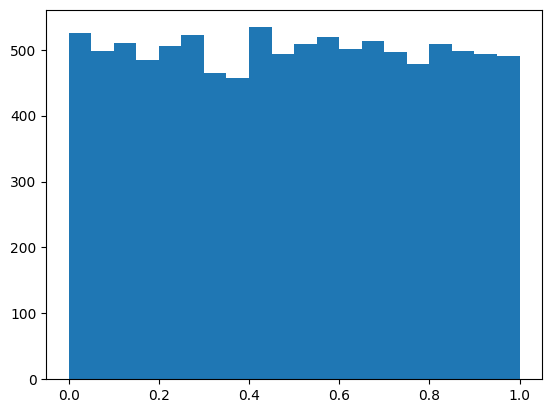

In [63]:
N =1
M = 10000
data = np.random.uniform(size=(M, N, 1))
plt.hist(data.mean(axis=1), bins=20)

(array([ 66., 130., 237., 327., 452., 516., 633., 734., 790., 891., 966.,
        870., 695., 680., 577., 496., 388., 296., 174.,  82.]),
 array([0.00200734, 0.05124105, 0.10047475, 0.14970846, 0.19894217,
        0.24817587, 0.29740958, 0.34664328, 0.39587699, 0.44511069,
        0.4943444 , 0.5435781 , 0.59281181, 0.64204552, 0.69127922,
        0.74051293, 0.78974663, 0.83898034, 0.88821404, 0.93744775,
        0.98668146]),
 <BarContainer object of 20 artists>)

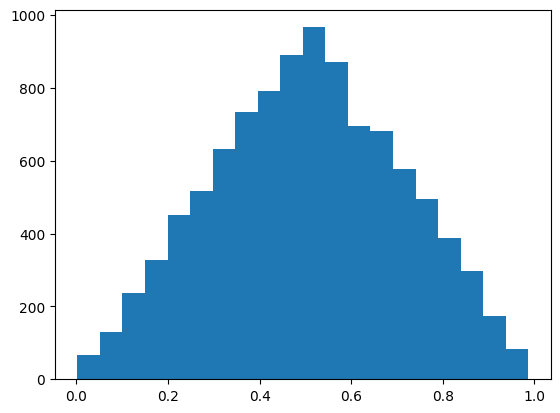

In [64]:
N =2
M = 10000
data = np.random.uniform(size=(M,N, 1))
plt.hist(data.mean(axis=1), bins=20)

(array([   5.,   17.,   49.,  149.,  315.,  537.,  859., 1152., 1329.,
        1396., 1311., 1083.,  793.,  515.,  273.,  141.,   51.,   18.,
           4.,    3.]),
 array([0.18767724, 0.22078448, 0.25389172, 0.28699897, 0.32010621,
        0.35321345, 0.38632069, 0.41942793, 0.45253517, 0.48564241,
        0.51874965, 0.55185689, 0.58496413, 0.61807138, 0.65117862,
        0.68428586, 0.7173931 , 0.75050034, 0.78360758, 0.81671482,
        0.84982206]),
 <BarContainer object of 20 artists>)

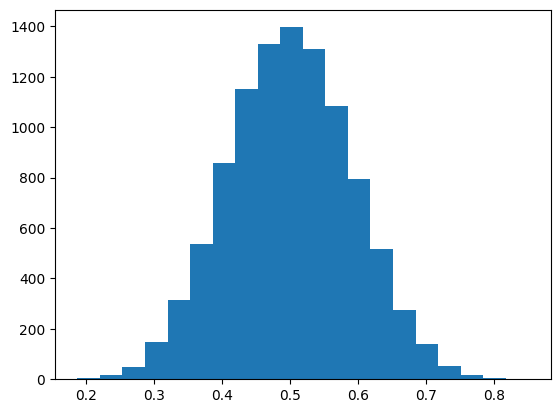

In [65]:
N =10
data = np.random.uniform(size=(M,N,1))
plt.hist(data.mean(axis=1), bins=20)

(array([   3.,   15.,   37.,  122.,  217.,  435.,  734., 1057., 1313.,
        1500., 1459., 1193.,  846.,  567.,  281.,  141.,   60.,   13.,
           4.,    3.]),
 array([0.26796393, 0.29197304, 0.31598215, 0.33999126, 0.36400036,
        0.38800947, 0.41201858, 0.43602769, 0.4600368 , 0.48404591,
        0.50805502, 0.53206413, 0.55607324, 0.58008234, 0.60409145,
        0.62810056, 0.65210967, 0.67611878, 0.70012789, 0.724137  ,
        0.74814611]),
 <BarContainer object of 20 artists>)

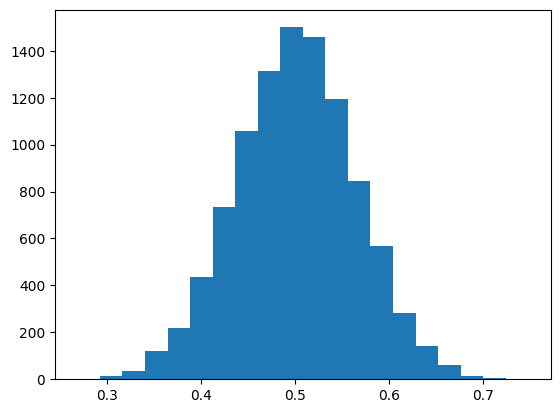

In [66]:
N =20
data = np.random.uniform(size=(M, N, 1))
plt.hist(data.mean(axis=1), bins=20)

In [114]:
sig1 = [[1, 0.9], [0.9, 1]]
sig2 = [[1, 0], [0, 1]]
sig3 = [[1, -0.9], [-0.9, 1]]
mu_1 = [0, 0]
N = 10000
data1 = np.random.multivariate_normal(mean=mu_1, cov=sig1, size=N)
data2 = np.random.multivariate_normal(mean=mu_1, cov=sig2, size=N)
data3 = np.random.multivariate_normal(mean=mu_1, cov=sig3, size=N)

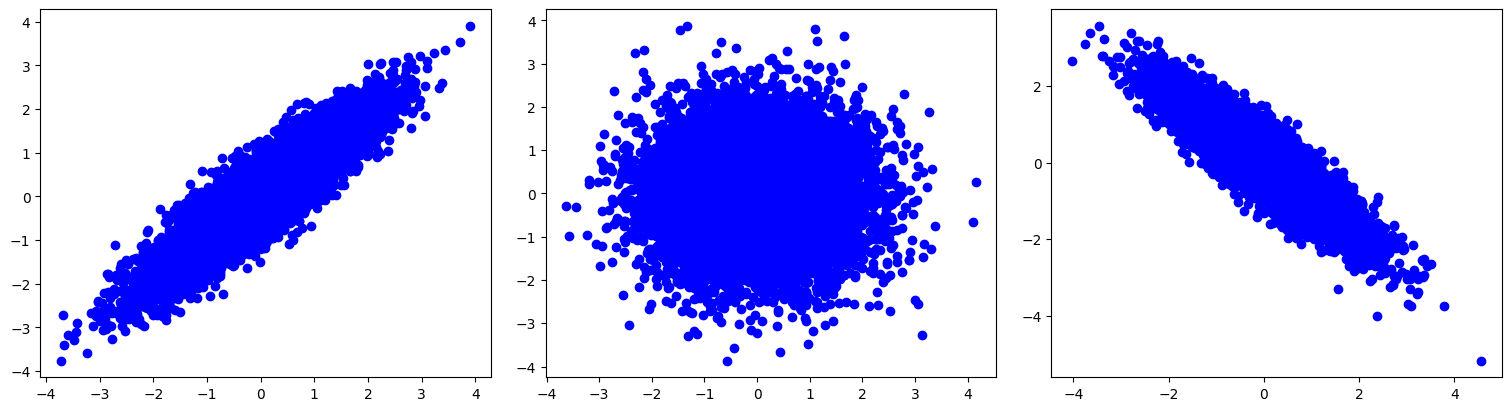

In [115]:
figure = plt.figure(constrained_layout=True, figsize=(15,4))
gs = figure.add_gridspec(nrows=1, ncols=3, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
ax.plot(data1[:, 0], data1[:, 1], 'bo')

ax = figure.add_subplot(gs[0,1])
ax.plot(data2[:, 0], data2[:, 1], 'bo', )

ax = figure.add_subplot(gs[0,2])
ax.plot(data3[:, 0], data3[:, 1], 'bo')

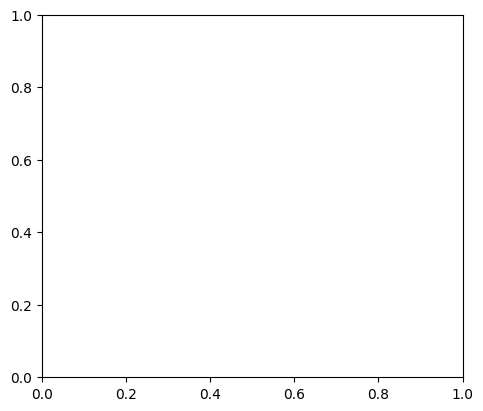

In [859]:
data[:, 0]

array([-5.19733457e-01, -1.78092487e+00, -1.28998169e+00,  2.18870595e+00,
       -2.78745528e-01,  2.85656405e-02,  1.19817187e-01,  1.28084637e+00,
       -1.50301042e+00,  1.98162824e-01,  4.61276824e-01, -1.73656665e-01,
       -1.30622344e+00,  2.46370237e+00,  1.20146635e+00, -2.69964888e-01,
       -9.27632684e-02, -9.69731455e-01,  4.34622301e-02, -6.89129448e-01,
       -3.14956014e-01, -6.83051899e-01, -6.61576029e-01,  1.49423478e-01,
        3.91841819e-03, -1.16217441e+00, -1.41112046e+00, -1.94845058e+00,
       -6.36454648e-01,  1.22799601e-01, -2.83121862e-01,  1.68248197e+00,
        1.05057845e-01, -1.42507553e-01, -1.20214479e+00,  1.50548829e+00,
        4.42440069e-01, -1.09573149e+00,  9.91009601e-01, -7.44678935e-01,
       -1.40882920e+00,  6.74349548e-01, -5.14564975e-02,  4.14270246e-01,
        1.10746604e-01, -5.15008265e-02, -1.66668812e+00, -2.81948680e-01,
       -2.73976330e+00, -1.86694182e+00, -7.50236554e-01,  9.64857672e-01,
        1.09031401e+00,  